In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import statistics as st
from scipy.stats import f
import math
import pandas as pd

In [2]:
from  tabulate import tabulate

In [3]:
bank=pd.read_csv('C:\\Users\\Koustav\\Downloads\\bankdata.csv')  

In [4]:
df=bank

In [130]:
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1144,42,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1291,33,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,1887,20,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1171,20,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,816,28,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,15476,117,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,8764,69,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,10291,60,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,8395,62,0.000


In [10]:
#4 analysis of education of customers who are with bank and left bank

In [14]:
a=df.groupby('Education_Level')['Attrition_Flag'].count()

In [15]:
a

Education_Level
College          1013
Doctorate         451
Graduate         3128
High School      2013
Post-Graduate     516
Uneducated       1487
Unknown          1519
Name: Attrition_Flag, dtype: int64

In [22]:
df['Attrition_Flag'].isnull().sum()

0

In [23]:
df['Education_Level'].isnull().sum()

0

In [31]:
A=pd.crosstab(df.Education_Level,df.Attrition_Flag)

In [32]:
A

Attrition_Flag,Attrited Customer,Existing Customer
Education_Level,,
College,154,859
Doctorate,95,356
Graduate,487,2641
High School,306,1707
Post-Graduate,92,424
Uneducated,237,1250
Unknown,256,1263


<AxesSubplot:xlabel='Education_Level'>

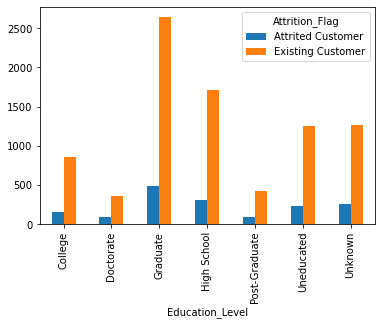

In [33]:
A.plot.bar()

<AxesSubplot:xlabel='Education_Level', ylabel='count'>

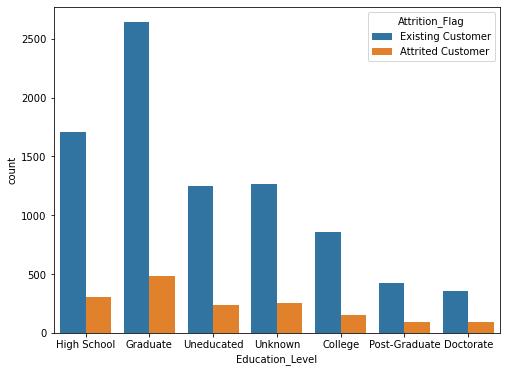

In [29]:
plt.figure(figsize=(8,6))
sb.countplot(x='Education_Level',hue='Attrition_Flag',data=df)

# Most of the existing customers are graduate and most customers who have left are also graduate 
#Most customers who are with the bank are either graduate or stdied till high school level

In [40]:
#5Analysis of transaction amount(Mean,median,mode) of customers who are existing and not existing

In [47]:
a=df[['Total_Trans_Amt','Attrition_Flag']] 
a

,Total_Trans_Amt,Attrition_Flag
0,1144,Existing Customer
1,1291,Existing Customer
2,1887,Existing Customer
3,1171,Existing Customer
4,816,Existing Customer
...,...,...
10122,15476,Existing Customer
10123,8764,Attrited Customer
10124,10291,Attrited Customer
10125,8395,Attrited Customer


In [83]:
k1=pd.pivot_table(a,index='Attrition_Flag',values='Total_Trans_Amt',aggfunc='mean')
k1

,Total_Trans_Amt
Attrition_Flag,
Attrited Customer,3095.025814
Existing Customer,4654.655882


<AxesSubplot:xlabel='Attrition_Flag'>

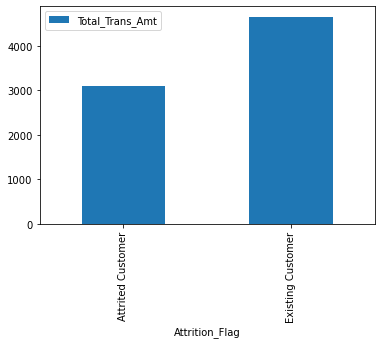

In [84]:
k1.plot.bar()

In [85]:
k2=pd.pivot_table(a,index='Attrition_Flag',values='Total_Trans_Amt',aggfunc='quantile')
k2

,Total_Trans_Amt
Attrition_Flag,
Attrited Customer,2329
Existing Customer,4100


<AxesSubplot:xlabel='Attrition_Flag'>

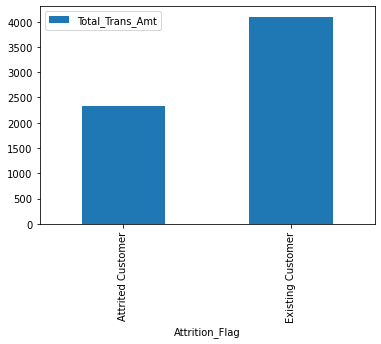

In [86]:
k2.plot.bar()

In [70]:
a1=a[(a.Attrition_Flag=='Existing Customer')] 
a1

,Total_Trans_Amt,Attrition_Flag
0,1144,Existing Customer
1,1291,Existing Customer
2,1887,Existing Customer
3,1171,Existing Customer
4,816,Existing Customer
...,...,...
10116,15354,Existing Customer
10117,17498,Existing Customer
10120,15577,Existing Customer
10121,14596,Existing Customer


In [76]:
m1=st.mode(a1['Total_Trans_Amt']) 

In [73]:
a2=a[(a.Attrition_Flag=='Attrited Customer')] 
a2

,Total_Trans_Amt,Attrition_Flag
21,692,Attrited Customer
39,704,Attrited Customer
51,705,Attrited Customer
54,602,Attrited Customer
61,691,Attrited Customer
...,...,...
10119,6009,Attrited Customer
10123,8764,Attrited Customer
10124,10291,Attrited Customer
10125,8395,Attrited Customer


In [81]:
m2=st.mode(a2['Total_Trans_Amt']) 


2108

In [82]:
print('mode transaction amount Exiting customers : ',m1)
print('mode transaction amount attired customers : ',m2)

mode transaction amount Exiting customers :  4253
mode transaction amount attired customers :  2108


<BarContainer object of 2 artists>

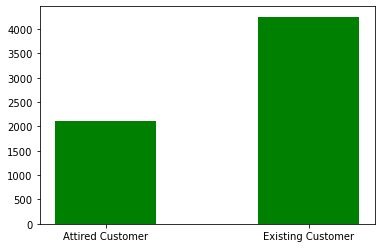

In [96]:
data={'Attired Customer':m2,'Existing Customer':m1}
c1=list(data.keys())
c2=list(data.values())
plt.bar(c1,c2,color='green',width=0.5)

# transaction amount for existing customer is greater than attiring customers
#mean,median,mode transaction amount for existing customer is greater than 
#that of mean,median,mode of customers who left the bank
#from this we can say those customers who have less transaction amount ie less transaction activity have higher chances of laving the bank

In [97]:
#6 average utilization ratio of existing customers

In [103]:
r=df[['Avg_Utilization_Ratio','Attrition_Flag']] 

In [106]:
r1=pd.pivot_table(r,index='Attrition_Flag',values='Avg_Utilization_Ratio',aggfunc='mean')
r1

,Avg_Utilization_Ratio
Attrition_Flag,
Attrited Customer,0.162475
Existing Customer,0.296412


In [110]:
r2=pd.pivot_table(r,index='Attrition_Flag',values='Avg_Utilization_Ratio',aggfunc='quantile')
r2


,Avg_Utilization_Ratio
Attrition_Flag,
Attrited Customer,0.000
Existing Customer,0.211


In [112]:
r.groupby('Attrition_Flag').describe()

Avg_Utilization_Ratio                                  \
                                  count      mean       std  min    25%   
Attrition_Flag                                                            
Attrited Customer                1627.0  0.162475  0.264458  0.0  0.000   
Existing Customer                8500.0  0.296412  0.272568  0.0  0.055   

                                          
                     50%      75%    max  
Attrition_Flag                            
Attrited Customer  0.000  0.23100  0.999  
Existing Customer  0.211  0.52925  0.994

<AxesSubplot:xlabel='Avg_Utilization_Ratio'>

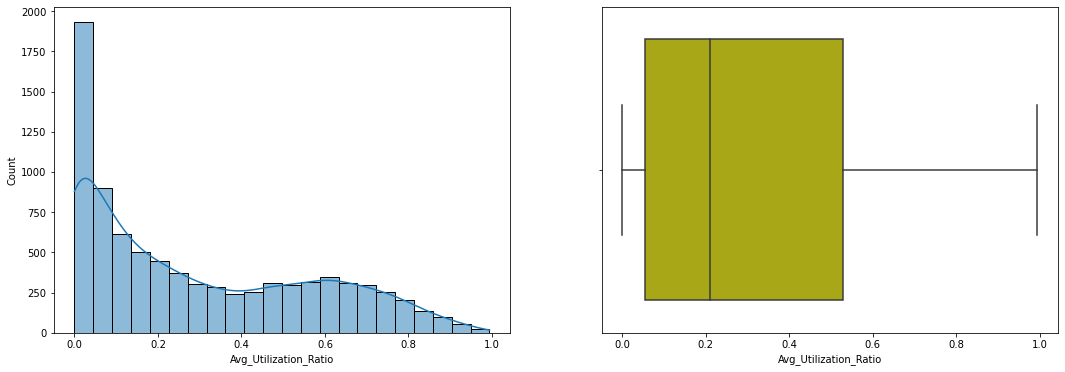

In [137]:
df1=df[(df['Attrition_Flag']=='Existing Customer')]
fig,ax=plt.subplots(1,2,figsize=(18,6))
sb.histplot(x=df1['Avg_Utilization_Ratio'],ax=ax[0],kde=True)
sb.boxplot(x=df1['Avg_Utilization_Ratio'],color='y',ax=ax[1])

#from the plots we can see  the spread and distribution avg utilization ratio of existing customers

# it lies between the range of 0 to 1 and most of them are between 0-0.2

In [ ]:
#mean,median avg_utiization_ratio for existing customers is more than that for customers who have left the bank
#this shows that avg_utilization_ratio is more for existing customers 

In [117]:
#3-total transaction amount of existing customers who are high school passouts 

In [126]:
df['Education_Level'].unique()

array(['High School', 'Graduate', 'Uneducated', 'Unknown', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [131]:
a=df[['Total_Trans_Amt','Attrition_Flag','Education_Level']] 
a1=a[(a.Education_Level=='High School') & (a.Attrition_Flag=='Existing Customer')] 

<AxesSubplot:xlabel='Total_Trans_Amt', ylabel='Count'>

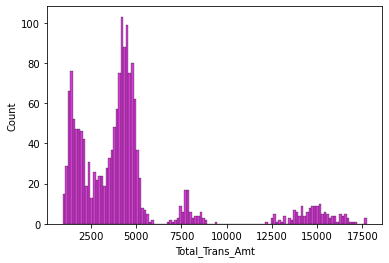

In [133]:
sb.histplot(x=a1['Total_Trans_Amt'],bins=120,color='m')

In [ ]:
sb.histplot(x=a1['Total_Trans_Amt'],bins=120,color='m')

# From the graph we can see total transaction amount of high school customers who are existing customers more customers have
#transaction amount less than 5000 as compared to rest ofthe customers

In [133]:
#2-Income_Category of breakdown of customers who are in high school and left in the bank

In [138]:
p=df[['Income_Category','Attrition_Flag','Education_Level']] 
p1=p[(p.Education_Level=='High School')]
p1

,Income_Category,Attrition_Flag,Education_Level
0,$60K - $80K,Existing Customer,High School
3,Less than $40K,Existing Customer,High School
7,$60K - $80K,Existing Customer,High School
18,$40K - $60K,Existing Customer,High School
22,$40K - $60K,Existing Customer,High School
...,...,...,...
10105,Less than $40K,Attrited Customer,High School
10109,Less than $40K,Existing Customer,High School
10113,$60K - $80K,Attrited Customer,High School
10120,$60K - $80K,Existing Customer,High School


In [143]:
p2=pd.crosstab(p1.Income_Category,p1.Attrition_Flag)
p2

Attrition_Flag,Attrited Customer,Existing Customer
Income_Category,,
$120K +,28,119
$40K - $60K,51,304
$60K - $80K,42,265
$80K - $120K,41,267
Less than $40K,101,570
Unknown,43,182


<AxesSubplot:xlabel='Income_Category', ylabel='count'>

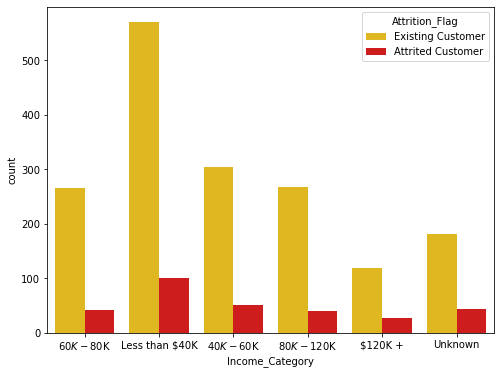

In [147]:

plt.figure(figsize=(8,6))
sb.countplot(x='Income_Category',hue='Attrition_Flag',data=p1,palette='hot_r')

# This graph shows income wise category breakdown of customers who have are high school passouts and are 
#with the bank and those who have left the bank 
#those who have left the bank and are high school pass outs most of them have income less than 40k,and 40k-60k

In [148]:
#8 analysis of transaction amount for blue cardcustomers who arent in bank and compare with existing customers

In [55]:
df1=df[['Total_Trans_Amt','Card_Category','Attrition_Flag']]
df2=df1[(df1.Card_Category=='Blue')]

In [56]:
df2.groupby('Attrition_Flag')['Total_Trans_Amt'].sum() 

Attrition_Flag
Attrited Customer     4417283
Existing Customer    34956907
Name: Total_Trans_Amt, dtype: int64

<AxesSubplot:xlabel='Attrition_Flag'>

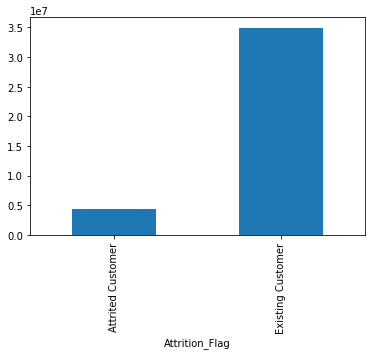

In [158]:
df2.groupby('Attrition_Flag')['Total_Trans_Amt'].sum().plot.bar() 

<AxesSubplot:ylabel='Total_Trans_Amt'>

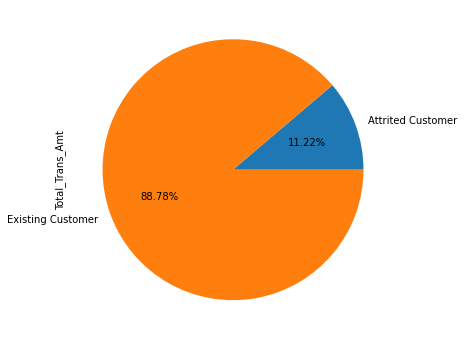

In [157]:

plt.figure(figsize=(8,6))
df2.groupby('Attrition_Flag')['Total_Trans_Amt'].sum().plot(kind='pie',autopct='%.2f%%') 

In [57]:
df2.groupby('Attrition_Flag')['Total_Trans_Amt'].mean() 

Attrition_Flag
Attrited Customer    2942.893404
Existing Customer    4473.625160
Name: Total_Trans_Amt, dtype: float64

<AxesSubplot:xlabel='Attrition_Flag'>

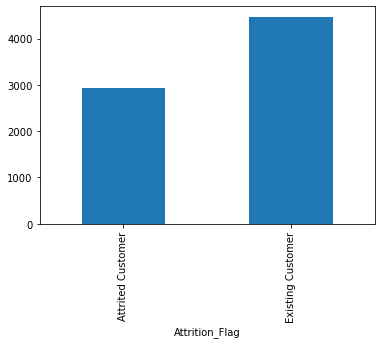

In [59]:
df2.groupby('Attrition_Flag')['Total_Trans_Amt'].mean().plot.bar() 

<AxesSubplot:ylabel='Total_Trans_Amt'>

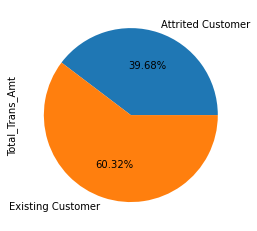

In [60]:
df2.groupby('Attrition_Flag')['Total_Trans_Amt'].mean().plot(kind='pie',autopct='%.2f%%') 

In [61]:
df2.groupby('Attrition_Flag')['Total_Trans_Amt'].describe()

,count,mean,std,min,25%,50%,75%,max
Attrition_Flag,,,,,,,,
Attrited Customer,1501.0,2942.893404,2167.401917,510.0,1893.0,2314.0,2705.00,10583.0
Existing Customer,7814.0,4473.625160,3302.296779,816.0,2315.0,4087.0,4738.75,18484.0


In [69]:
df2.groupby('Attrition_Flag')['Total_Trans_Amt'].quantile()

Attrition_Flag
Attrited Customer    2314.0
Existing Customer    4087.0
Name: Total_Trans_Amt, dtype: float64

<AxesSubplot:ylabel='Total_Trans_Amt'>

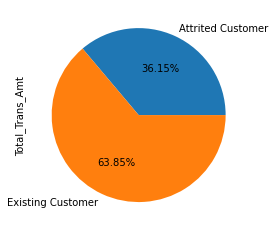

In [70]:
df2.groupby('Attrition_Flag')['Total_Trans_Amt'].quantile().plot(kind='pie',autopct='%.2f%%')

In [68]:
df3=df2[(df2.Attrition_Flag=='Attrited Customer')]
df4=df2[(df2.Attrition_Flag=='Existing Customer')]
print('Mode transaction amount of attrited customer : ',st.mode(df3['Total_Trans_Amt']))
print('Mode transaction amount of existing customer : ',st.mode(df4['Total_Trans_Amt']))


Mode transaction amount of attrited customer :  2108
Mode transaction amount of existing customer :  4253


# share of transaction amount of blue card customers are more for existing customers and less for customers who left the bank
#mean,median ,mode of transaction amount for blue card customers those who are in the bank are more than those who left the bank

<AxesSubplot:xlabel='Income_Category', ylabel='count'>

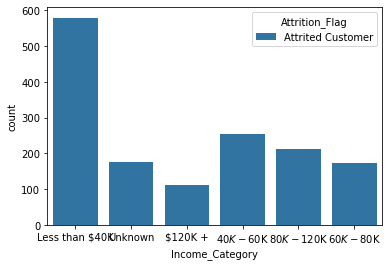

In [136]:
#task7-analysis of churned out customers who hold blue card wrt to income
df1=df[(df.Card_Category=='Blue') & (df.Attrition_Flag=='Attrited Customer')]
sb.countplot(data=df1,x='Income_Category',hue='Attrition_Flag')
#from the graph we can say that customers with less than 40k income are most in number for blue carded customer who are churned out

In [ ]:
#9-credit limit of blue card customers affecting the churn

In [165]:
d=df[['Attrition_Flag','Education_Level']]
d1=d[d.Education_Level=='High School']
d1

,Attrition_Flag,Education_Level
0,Existing Customer,High School
3,Existing Customer,High School
7,Existing Customer,High School
18,Existing Customer,High School
22,Existing Customer,High School
...,...,...
10105,Attrited Customer,High School
10109,Existing Customer,High School
10113,Attrited Customer,High School
10120,Existing Customer,High School


In [166]:
d1.groupby('Attrition_Flag')['Education_Level'].count()

Attrition_Flag
Attrited Customer     306
Existing Customer    1707
Name: Education_Level, dtype: int64

<AxesSubplot:xlabel='Attrition_Flag'>

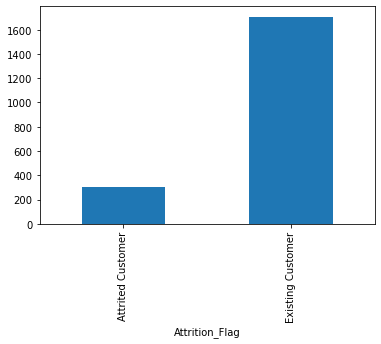

In [167]:
d1.groupby('Attrition_Flag')['Education_Level'].count().plot.bar()

In [172]:
df1=df[['Card_Category','Attrition_Flag','Credit_Limit']]
df2=df1[(df1.Card_Category=='Blue')]

In [174]:
df2.groupby('Attrition_Flag')['Credit_Limit'].sum()

Attrition_Flag
Attrited Customer    10287100.6
Existing Customer    58604969.5
Name: Credit_Limit, dtype: float64

<AxesSubplot:ylabel='Credit_Limit'>

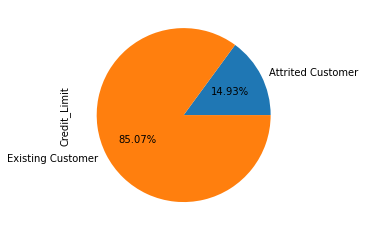

In [175]:
df2.groupby('Attrition_Flag')['Credit_Limit'].sum().plot(kind='pie',autopct='%.2f%%') 

<AxesSubplot:xlabel='Attrition_Flag'>

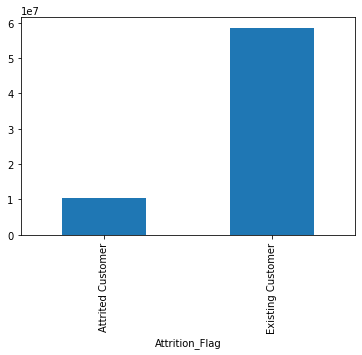

In [176]:
df2.groupby('Attrition_Flag')['Credit_Limit'].sum().plot.bar()

# credit limit of blue card customers are lot more for existing customers and far less for
#those customers who have left

In [177]:
#10-Ananlysis of the dependent count wrt customers who have churned out and customers who are still using the services

In [74]:
df1=df[['Dependent_count','Attrition_Flag']]
df1.groupby('Attrition_Flag')['Dependent_count'].mean()

Attrition_Flag
Attrited Customer    2.724032
Existing Customer    2.799529
Name: Dependent_count, dtype: float64

In [182]:
df1.groupby('Attrition_Flag')['Dependent_count'].describe()

,count,mean,std,min,25%,50%,75%,max
Attrition_Flag,,,,,,,,
Attrited Customer,1627.0,2.724032,5.618734,0.0,2.0,2.0,3.0,142.0
Existing Customer,8500.0,2.799529,6.631337,0.0,1.0,2.0,3.0,143.0


<AxesSubplot:ylabel='Dependent_count'>

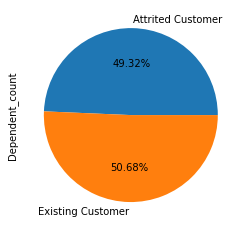

In [183]:
df1.groupby('Attrition_Flag')['Dependent_count'].mean().plot(kind='pie',autopct='%.2f%%') 

<AxesSubplot:xlabel='Attrition_Flag'>

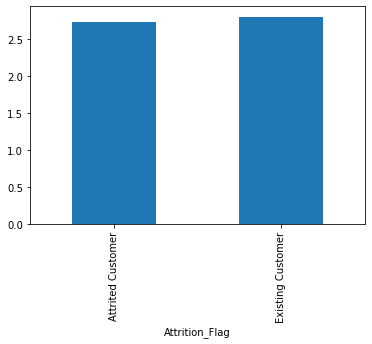

In [76]:
a=df1.groupby('Attrition_Flag')['Dependent_count'].mean()
a.plot.bar()

# dependent counts of customers who are with the bank and those who have left the bank are
#approximately same

In [184]:
#11-Relation between credit limit and attrition

In [189]:
c=pd.pivot_table(df,index='Attrition_Flag',values='Credit_Limit',aggfunc='mean')
c

,Credit_Limit
Attrition_Flag,
Attrited Customer,8231.120198
Existing Customer,8793.647609


<AxesSubplot:xlabel='Attrition_Flag', ylabel='Credit_Limit'>

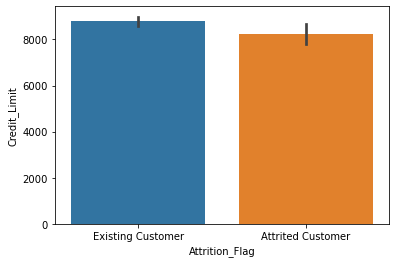

In [191]:
sb.barplot(data=df,x='Attrition_Flag',y='Credit_Limit',estimator=np.mean)

# From this we can say that credit limit and attrition arent strongly related to each other
#credit limit share of existing customers are almost same to that of customers who have left the bank

In [192]:
#13-how education level and income category is affecting customer churn

In [195]:
df1=df[['Education_Level','Attrition_Flag']] 
df1

,Education_Level,Attrition_Flag
0,High School,Existing Customer
1,Graduate,Existing Customer
2,Graduate,Existing Customer
3,High School,Existing Customer
4,Uneducated,Existing Customer
...,...,...
10122,Graduate,Existing Customer
10123,Unknown,Attrited Customer
10124,High School,Attrited Customer
10125,Graduate,Attrited Customer


In [201]:
pd.crosstab(df1.Education_Level,df2.Attrition_Flag)

Attrition_Flag,Attrited Customer,Existing Customer
Education_Level,,
College,141,784
Doctorate,90,326
Graduate,446,2421
High School,284,1587
Post-Graduate,82,385
Uneducated,218,1153
Unknown,240,1158


<AxesSubplot:xlabel='Education_Level'>

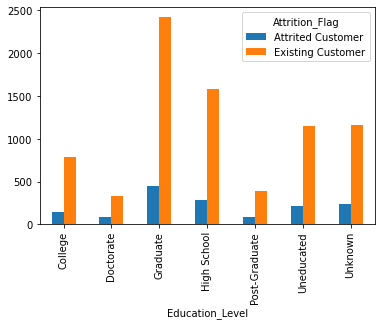

In [203]:
pd.crosstab(df1.Education_Level,df2.Attrition_Flag).plot.bar()

# education level of most customers who are with the bank are graduates,most who left are also graduate
#education level of least number of customers with the bank are doctorate,and least num of customers who left are also doctorate
#so we can say educatio level doesnt affect customer churn

In [204]:
#14-identify churned out customer with high income category,high education level, and high credit limit

In [5]:
df1=df[['Attrition_Flag','Income_Category','Education_Level','Credit_Limit']]
df2=df1[(df1.Attrition_Flag=='Attrited Customer')]  
df2

,Attrition_Flag,Income_Category,Education_Level,Credit_Limit
21,Attrited Customer,Less than $40K,Graduate,1438.3
39,Attrited Customer,Unknown,Doctorate,7882.0
51,Attrited Customer,Less than $40K,Graduate,1438.3
54,Attrited Customer,$120K +,Graduate,15769.0
61,Attrited Customer,$60K - $80K,Graduate,34516.0
...,...,...,...,...
10119,Attrited Customer,Unknown,Uneducated,14657.0
10123,Attrited Customer,$40K - $60K,Unknown,4277.0
10124,Attrited Customer,Less than $40K,High School,5409.0
10125,Attrited Customer,$40K - $60K,Graduate,5281.0


In [214]:
pd.crosstab(df2.Attrition_Flag,df2.Education_Level)

Education_Level,College,Doctorate,Graduate,High School,Post-Graduate,Uneducated,Unknown
Attrition_Flag,,,,,,,
Attrited Customer,154,95,487,306,92,237,256


<AxesSubplot:xlabel='Attrition_Flag'>

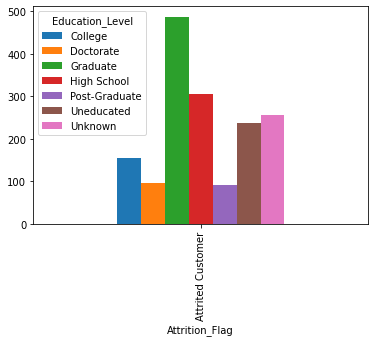

In [215]:
pd.crosstab(df2.Attrition_Flag,df2.Education_Level).plot.bar()

In [ ]:
#different categories of education level of churned out customers

In [226]:
a1=df2.groupby('Income_Category')['Income_Category'].count()
a1

Income_Category
$120K +           126
$40K - $60K       271
$60K - $80K       189
$80K - $120K      242
Less than $40K    612
Unknown           187
Name: Income_Category, dtype: int64

In [227]:
a2=df2['Income_Category'].value_counts()
a2

Less than $40K    612
$40K - $60K       271
$80K - $120K      242
$60K - $80K       189
Unknown           187
$120K +           126
Name: Income_Category, dtype: int64

<AxesSubplot:xlabel='Income_Category'>

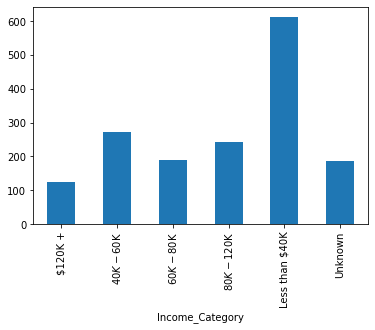

In [228]:
a1.plot.bar()

In [ ]:
#diff distinct income category of customers who are churned out

<AxesSubplot:xlabel='Credit_Limit', ylabel='Count'>

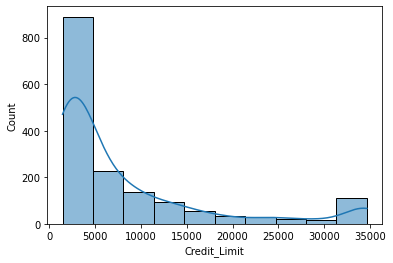

In [9]:
sb.histplot(data=df2['Credit_Limit'],kde=True,bins=10)

<AxesSubplot:xlabel='Credit_Limit', ylabel='Density'>

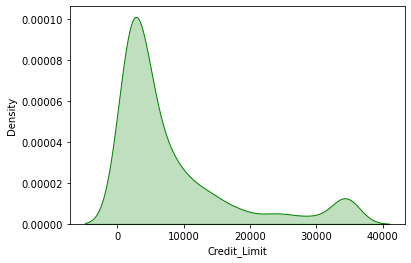

In [12]:
sb.kdeplot(df2['Credit_Limit'],shade=True,color='g')

In [ ]:
#distribution of credit limit of customers who have churned out

In [ ]:
#16-Analysis of martial status and utilization ratio of customers who have left the bank and are in the bank

In [30]:
df1=df[['Marital_Status','Attrition_Flag','Avg_Utilization_Ratio']]
df1

,Marital_Status,Attrition_Flag,Avg_Utilization_Ratio
0,Married,Existing Customer,0.061
1,Single,Existing Customer,0.105
2,Married,Existing Customer,0.000
3,Unknown,Existing Customer,0.760
4,Married,Existing Customer,0.000
...,...,...,...
10122,Single,Existing Customer,0.462
10123,Divorced,Attrited Customer,0.511
10124,Married,Attrited Customer,0.000
10125,Unknown,Attrited Customer,0.000


In [84]:
pd.crosstab(df.Attrition_Flag,df.Marital_Status)

Marital_Status,Divorced,Married,Single,Unknown
Attrition_Flag,,,,
Attrited Customer,121,709,668,129
Existing Customer,627,3978,3275,620


<AxesSubplot:xlabel='Attrition_Flag'>

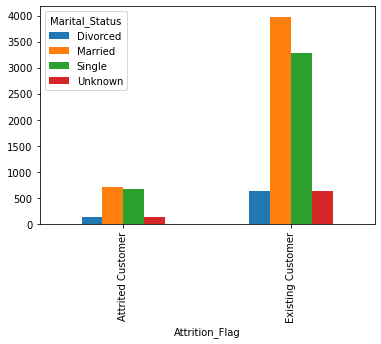

In [85]:
pd.crosstab(df.Attrition_Flag,df.Marital_Status).plot.bar()

In [ ]:
#out of the existing customers with the bank most are either married or single
#out of the customers who have left the bank are either married or single ie most customers who avail the services of the bank
#are either married or single

<AxesSubplot:title={'center':'Avg_Utilization_Ratio'}, xlabel='Attrition_Flag'>

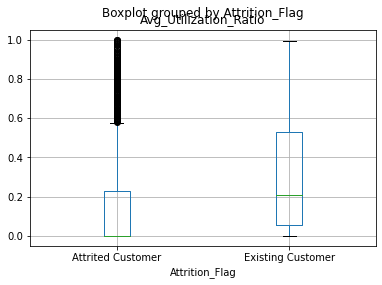

In [35]:
df1.boxplot(by='Attrition_Flag',column=['Avg_Utilization_Ratio'])

In [ ]:
#avg_utilization ratio has a wider spread for existing customer than those who have left the bank

In [36]:
#17-Is there is any relation between credit limit offered to customers having lower utilization ratio
#than those having higher utilization ratio

In [40]:
df['Credit_Limit'].corr(df['Avg_Utilization_Ratio'])

-0.4758013130823968

<AxesSubplot:xlabel='Avg_Utilization_Ratio', ylabel='Credit_Limit'>

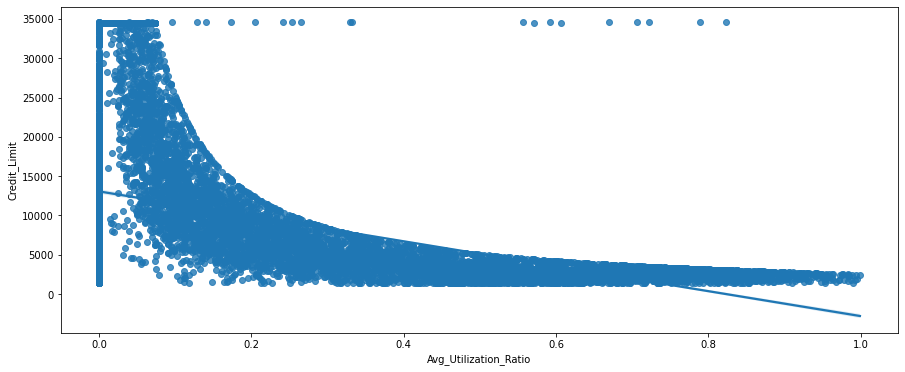

In [43]:
plt.figure(figsize=(15,6))
sb.regplot(x='Avg_Utilization_Ratio',y='Credit_Limit',data=df)

<AxesSubplot:>

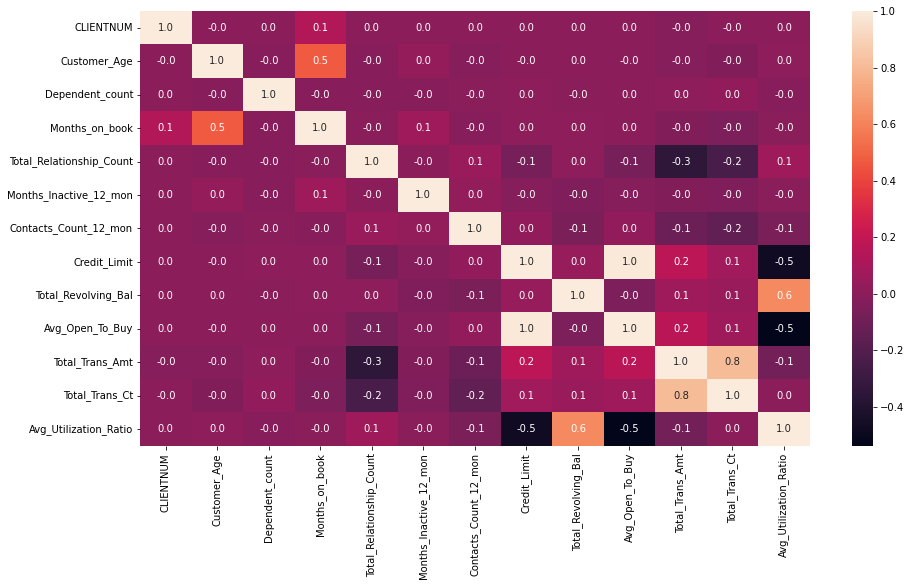

In [11]:
corr_df=df.corr()
plt.figure(figsize=(15,8))
sb.heatmap(corr_df,annot=True,fmt='.1f')

# avg utilization ratio is negatively correalted with credit limit,
#from the regression plot,heatmap and correlation coeffiecient we can say this
#which means when credit limit increases avg_utilization ratio decreases

In [89]:
#1-card category wise analysis of customers who are high school pass outs and churned out

In [92]:
df1=df[(df.Attrition_Flag=='Attrited Customer') & (df.Education_Level=='High School')]
df1

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
140,789322833,Attrited Customer,48,F,5,High School,Married,Less than $40K,Blue,38,1,3,3,8025.0,0,8025.0,673,18,0.000
198,708868233,Attrited Customer,213,M,0,High School,Married,Less than $40K,Blue,52,1,3,2,1438.3,900,538.3,760,21,0.626
247,712125258,Attrited Customer,46,M,4,High School,Married,$120K +,Blue,30,3,3,3,2442.0,0,2442.0,701,19,0.000
253,772390908,Attrited Customer,59,M,0,High School,Single,$40K - $60K,Blue,48,2,4,3,3616.0,1054,2562.0,687,17,0.291
268,771809733,Attrited Customer,64,F,0,High School,Married,$40K - $60K,Blue,53,1,3,3,3353.0,0,3353.0,960,18,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10065,709865883,Attrited Customer,38,M,2,High School,Divorced,$60K - $80K,Silver,25,1,2,3,26794.0,821,25973.0,8788,58,0.031
10103,717185658,Attrited Customer,51,M,1,High School,Married,$80K - $120K,Blue,36,4,3,4,22754.0,0,22754.0,8531,77,0.000
10105,709646433,Attrited Customer,59,F,1,High School,Married,Less than $40K,Blue,50,1,4,3,5043.0,743,4300.0,10170,66,0.147
10113,713733633,Attrited Customer,27,M,0,High School,Divorced,$60K - $80K,Blue,36,2,3,2,13303.0,2517,10786.0,10219,85,0.189


In [93]:
df1['Card_Category'].value_counts()

Blue      284
Silver     15
Gold        4
Name: Card_Category, dtype: int64

<AxesSubplot:>

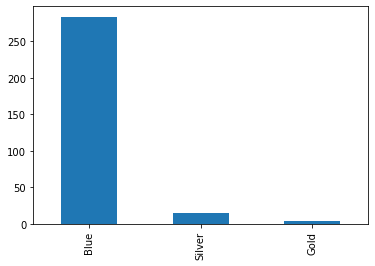

In [94]:
df1['Card_Category'].value_counts().plot.bar()

<AxesSubplot:ylabel='Card_Category'>

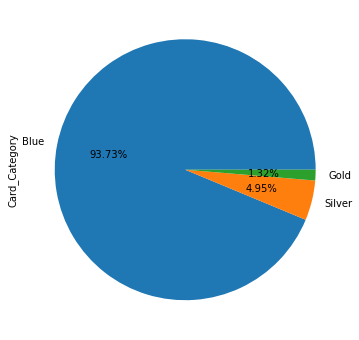

In [99]:
plt.figure(figsize=(15,6))
df1['Card_Category'].value_counts().plot(kind='pie',autopct='%.2f%%')

# customers who are churned out and high school passouts,almost all of them are blue card customers,
#silver and gold card customers are almost negligible in number

In [107]:
df1=df[['Avg_Utilization_Ratio','Attrition_Flag','Customer_Age']]
df1

,Avg_Utilization_Ratio,Attrition_Flag,Customer_Age
0,0.061,Existing Customer,45
1,0.105,Existing Customer,49
2,0.000,Existing Customer,51
3,0.760,Existing Customer,40
4,0.000,Existing Customer,40
...,...,...,...
10122,0.462,Existing Customer,50
10123,0.511,Attrited Customer,41
10124,0.000,Attrited Customer,44
10125,0.000,Attrited Customer,30


In [109]:
df1['Avg_Utilization_Ratio'].describe()
#median avg_utilization_ratio=0.176

count    10127.000000
mean         0.274894
std          0.275691
min          0.000000
25%          0.023000
50%          0.176000
75%          0.503000
max          0.999000
Name: Avg_Utilization_Ratio, dtype: float64

<AxesSubplot:xlabel='Avg_Utilization_Ratio', ylabel='Count'>

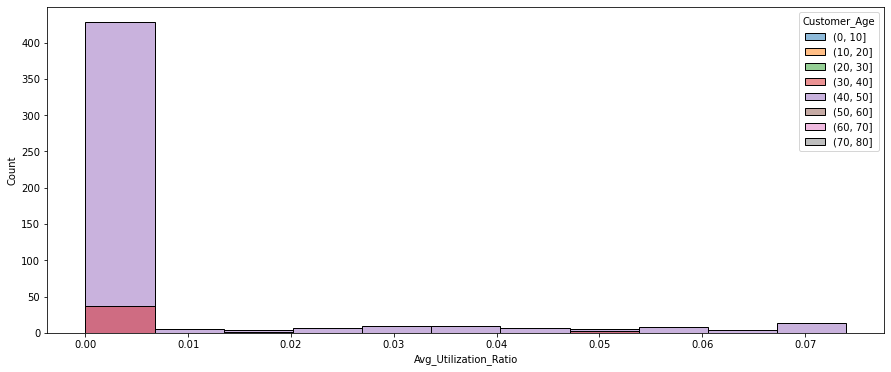

In [8]:
df2=df1[(df1.Avg_Utilization_Ratio<0.075) & (df1.Attrition_Flag=='Attrited Customer')]
plt.figure(figsize=(15,6))
bins=[0,10,20,30,40,50,60,70,80]
d=pd.cut(df['Customer_Age'],bins=bins)
sb.histplot(x=df2['Avg_Utilization_Ratio'],hue=d)

# from this graph we can see if utilization ratio is less then attrition of customers is more
#thus we can say lower the utilization ratio higher is the chances for the customer to leave
 

In [117]:
#12-avg utilization ratio of credit card  for each subgroup between 40 and 50

In [5]:
df1=df[(df.Customer_Age >=40  ) & (df.Customer_Age<=50)]
df1

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1144,42,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1291,33,0.105
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1171,20,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,816,28,0.000
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.0,1247,2763.0,1088,24,0.311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10118,713755458,Attrited Customer,50,M,1,Unknown,Unknown,$80K - $120K,Blue,36,6,3,4,9959.0,952,9007.0,10310,63,0.096
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,15476,117,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,8764,69,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,10291,60,0.000


<AxesSubplot:xlabel='Avg_Utilization_Ratio', ylabel='Count'>

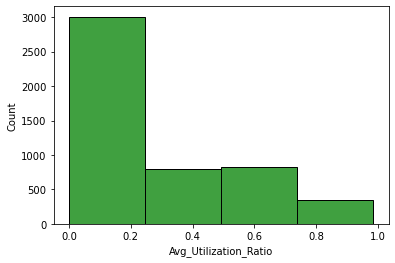

In [6]:
sb.histplot(x=df1['Avg_Utilization_Ratio'],bins=4,color='green')

# the avgutilization ratio is between 0 to 0.2 for most of the customers with age 40-50